In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
subj = pd.read_excel('Субъекты.xlsx')

subj.columns = [
    'a1', 'FO', 'subject', 'sport obj',
    'a2', 'plosk', 'a4', 'a5', 'population',
    'sport pop', 'a6', 'a7', 'a8', 'ranks', 
    'epc', 'top ranks', 'interes', 'a11', 'a12',
    'money', 'a13', 'a14'
]

subj = subj[[
    'FO', 'subject', 'population', 
    'sport pop', 'ranks',
    'top ranks', 'epc', 
    'money'
]]

subj.drop(labels = [0, 1], inplace = True)
subj.reset_index(drop = True, inplace = True)

for i in range(0, len(subj.index) - 1, 2):
    subj.iloc[i, 2] = subj.iloc[i, 3] / subj.iloc[i + 1, 3]
    subj.iloc[i, 4] = subj.iloc[i + 1, 5]
    

federal = subj[
    (subj['subject'] == 'Центральный федеральный округ')|
    (subj['subject'] == 'Северо-Западный федеральный округ')|
    (subj['subject'] == 'Южный федеральный округ')|
    (subj['subject'] == 'Северо-Кавказский федеральный округ')|
    (subj['subject'] == 'Приволжский федеральный округ')|
    (subj['subject'] == 'Уральский федеральный округ')|
    (subj['subject'] == 'Сибирский федеральный округ')|
    (subj['subject'] == 'Дальневосточный федеральный округ')
]

russia = subj[subj['subject'] == 'Российская Федерация']

subj.drop(labels = [36, 60, 78, 94, 124, 138, 160, 184, 186, 185, 187], inplace = True)
subj = subj.dropna(subset = ['subject'])
subj.reset_index(drop = True, inplace = True)

federal.reset_index(drop = True, inplace = True)
russia.reset_index(drop = True, inplace = True)

In [3]:
subj

,FO,subject,population,sport pop,ranks,top ranks,epc,money
0,ЦФО,Белгородская область,1.363998e+06,800394.0,10777.0,82,0.850,2.906311e+06
1,ЦФО,Брянская область,1.045096e+06,422025.0,8718.0,75,0.640,1.841680e+06
2,ЦФО,Владимирская область,1.182312e+06,660230.0,14943.0,59,0.777,3.071491e+06
3,ЦФО,Воронежская область,2.048357e+06,1152623.0,25219.0,95,0.692,5.887827e+06
4,ЦФО,Ивановская область,8.839740e+05,394558.0,4665.0,54,0.514,2.132666e+06
...,...,...,...,...,...,...,...,...
80,ДФО,Амурская область,6.998650e+05,318625.0,4592.0,11,0.848,2.320356e+06
81,ДФО,Магаданская область,1.287910e+05,59104.0,707.0,9,0.730,1.860173e+06
82,ДФО,Сахалинская область,4.477490e+05,282152.0,4347.0,32,0.637,1.004286e+07
83,ДФО,Еврейская автономная область,1.381170e+05,46010.0,238.0,3,0.639,1.972104e+05


In [4]:
subj_ranked = subj.dropna(subset = ['subject'])

for i in range(len(subj_ranked.index)):
    subj_ranked.iloc[i, 3] = subj_ranked.iloc[i, 3] / subj.iloc[i, 2]
    subj_ranked.iloc[i, 4] = subj_ranked.iloc[i, 4] / (subj.iloc[i, 3] - subj.iloc[i, 5])
    subj_ranked.iloc[i, 5] = subj_ranked.iloc[i, 5] / (subj.iloc[i, 3] - subj.iloc[i, 4])
    
subj_ranked = subj_ranked.merge(federal[['FO', 'money']], on = 'FO', how = 'left', suffixes = ('', '_x'))

subj_ranked['money'] = subj_ranked['money'] / subj_ranked['money_x']
subj_ranked = subj_ranked[[
    'FO', 'subject', 
    'sport pop', 'ranks',
    'top ranks', 'epc',
    'money'
]]

subj_ranked['R'] = np.sum(subj_ranked[['sport pop', 'ranks', 'top ranks', 'money']], axis = 1)*subj_ranked['epc'] 

In [5]:
subj_ranked

,FO,subject,sport pop,ranks,top ranks,epc,money,R
0,ЦФО,Белгородская область,0.586800,0.013466,0.000104,0.850,0.016712,0.524520
1,ЦФО,Брянская область,0.403815,0.020661,0.000181,0.640,0.010590,0.278558
2,ЦФО,Владимирская область,0.558423,0.022635,0.000091,0.777,0.017662,0.465277
3,ЦФО,Воронежская область,0.562706,0.021881,0.000084,0.692,0.033857,0.428022
4,ЦФО,Ивановская область,0.446346,0.011825,0.000138,0.514,0.012264,0.241874
...,...,...,...,...,...,...,...,...
80,ДФО,Амурская область,0.455266,0.014412,0.000035,0.848,0.053653,0.443815
81,ДФО,Магаданская область,0.458914,0.011964,0.000154,0.730,0.043012,0.375252
82,ДФО,Сахалинская область,0.630157,0.015408,0.000115,0.637,0.232217,0.559221
83,ДФО,Еврейская автономная область,0.333123,0.005173,0.000066,0.639,0.004560,0.219127


In [6]:
FO = federal['FO'].to_list()
fed_R = []
for i in range(len(FO)):
    fed_R.append(np.sum(subj_ranked[subj_ranked['FO'] == FO[i]]['R'], axis = 0))
federal['R'] = fed_R
russia['R'] = sum(fed_R)

In [7]:
federal

,FO,subject,population,sport pop,ranks,top ranks,epc,money,R
0,ЦФО,Центральный федеральный округ,NaN,18198162.0,291096.0,2343,NaN,1.739018e+08,7.284424
1,СЗФО,Северо-Западный федеральный округ,NaN,6730859.0,70412.0,1032,NaN,1.146740e+08,4.282392
2,ЮФО,Южный федеральный округ,NaN,8110116.0,120653.0,681,NaN,6.063090e+07,2.940793
3,СКФО,Северо-Кавказский федеральный округ,NaN,4798784.0,40809.0,412,NaN,2.504976e+07,2.096802
4,ПФО,Приволжский федеральный округ,NaN,14088995.0,234050.0,1427,NaN,1.019703e+08,5.983646
5,УФО,Уральский федеральный округ,NaN,6120001.0,112562.0,723,NaN,7.742378e+07,2.683039
6,СФО,Сибирский федеральный округ,NaN,7877201.0,90094.0,855,NaN,7.447583e+07,4.032867
7,ДФО,Дальневосточный федеральный округ,NaN,3905004.0,66894.0,388,NaN,4.324769e+07,4.266252


In [8]:
MMR = subj_ranked.append(federal)
MMR = MMR.append(russia)
MMR = MMR[['FO', 'subject', 'R']]
MMR = MMR.sort_values(by = ['R'])
MMR.reset_index(drop = True, inplace = True)
stand = MMR[0:85].std()[0]
MMR['W'] = np.nan
MMR.loc[(MMR['R'] >= 0.1) & (MMR['R'] < 0.15), 'W'] = 1
for i in range(2, 8):
    MMR.loc[(MMR['R'] >= 0.05 + (i - 1)/10) & (MMR['R'] < 0.05 + i/10), 'W'] = i
MMR.loc[(MMR['R'] >= 2) & (MMR['R'] < 3), 'W'] = 10.0
MMR.loc[(MMR['R'] >= 4) & (MMR['R'] < 5), 'W'] = 12.0
MMR.loc[(MMR['R'] >= 5) & (MMR['R'] < 6), 'W'] = 14.0
MMR.loc[(MMR['R'] >= 7) & (MMR['R'] < 8), 'W'] = 15.0
MMR.loc[MMR['R'] >= 30, 'W'] = 18.0

C:\Users\User\AppData\Local\Temp\ipykernel_6584\3314179929.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MMR = subj_ranked.append(federal)
C:\Users\User\AppData\Local\Temp\ipykernel_6584\3314179929.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MMR = MMR.append(russia)
C:\Users\User\AppData\Local\Temp\ipykernel_6584\3314179929.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stand = MMR[0:85].std()[0]


In [9]:
MMR.tail(30)

,FO,subject,R,W
64,ЦФО,Тульская область,0.466717,5.0
65,УФО,Ямало-Ненецкий автономный округ,0.474809,5.0
66,ПФО,Республика Башкортостан,0.482102,5.0
67,ПФО,Ульяновская область,0.482835,5.0
68,ПФО,Республика Мордовия,0.491917,5.0
69,ДФО,Камчатский край,0.496092,5.0
70,УФО,Свердловская область,0.496449,5.0
71,ЦФО,Липецкая область,0.510712,5.0
72,ПФО,Республика Татарстан (Татарстан),0.523652,5.0
73,ЦФО,Белгородская область,0.524520,5.0


In [10]:
aa = MMR['W'].to_list()
kef = 89/18
for i in range(len(aa)):
    aa[i] = aa[i] * kef
MMR["W1"] = aa

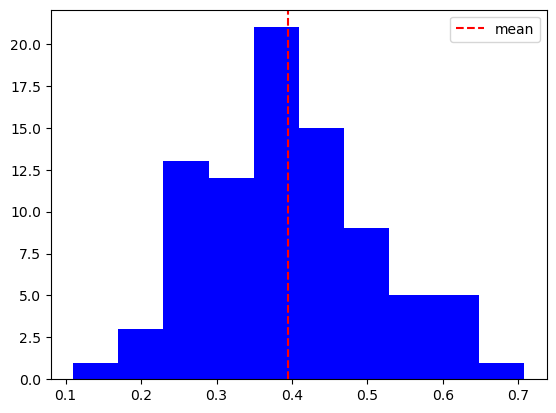

In [11]:
rasp_sub = MMR[0:85]['R'].to_list()
plt.hist(rasp_sub, bins = 10, color = 'b')
plt.axvline(MMR[0:85]['R'].mean(), ls = '--', color = 'r', label = 'mean')
plt.legend()
plt.show()

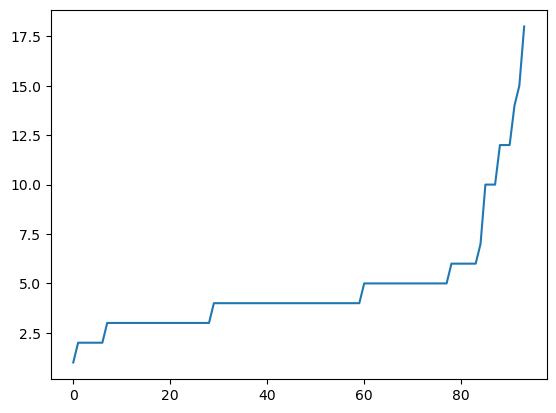

In [12]:
MMR['W'].plot()
plt.show()

In [13]:
faq = ["ИЭМИТ", "ИБДА", "ИГСУ", "ИОН", "ИОМ", "ИПНБ", "ИУРР", "ИФУР", "ВШКУ", "ВШФМ", "ФЭСН", "ФФБ"]

In [14]:
cheliki1 = pd.read_csv('sport.csv')
cheliki1 = cheliki1[['name','institute', 'achievement_1', 'achievement_2','achievement_3','achievement_4']]

In [15]:
cheliki1 = cheliki1.replace(np.nan, '0')
for i in range(2, 6):
    cheliki1[cheliki1.columns[i]] = cheliki1[cheliki1.columns[i]].str.lower()

In [16]:
cheliki1

,name,institute,achievement_1,achievement_2,achievement_3,achievement_4
0,Степан Сергеев,ИБДА,победитель спортивных играх академии по мини-ф...,победитель городских соревнований по плаванию ...,победитель спортивных игр академии по мини-фут...,0
1,Даниил Сидоров,ИБДА,победитель открытого первенства пансиона воспи...,победитель x всероссийского любительского турн...,победитель кубка ректора по футболу в рамках v...,0
2,Никита Васильев,ИБДА,лучший игрок на спортивных играх академии по м...,победитель межрегиональной лиги вузов по чирли...,победитель общероссийских рейтинговых соревнов...,0
3,Вероника Фирсова,ИГСУ,победитель кубка россии по спорту слепых (дисц...,"победитель чемпионата и первенства цфо, кубка ...",0,0
4,Артемий Антонов,ИГСУ,победитель спортивных играх академии по мини-ф...,победитель x всероссийского любительского турн...,победитель межрегиональной лиги вузов по чирли...,0
5,Никита Сидоров,ИГСУ,победитель открытого первенства пансиона воспи...,победитель 9-м всероссийском любительском турн...,0,0
6,Арина Семенова,ИОН,победитель открытого кубка рту мирэа по плаван...,победитель x всероссийского любительского турн...,победитель кубка ректора по футболу в рамках v...,победитель на v спартакиаде ранхигс по мини-фу...
7,Александра Горелова,ИОН,победитель спортивных играх академии по мини-ф...,победитель соревнований по гандболу в программ...,победитель общероссийских рейтинговых соревнов...,0
8,Иван Куликов,ИОН,победитель городских соревнований по плаванию ...,победитель всероссийских соревнований по чир-с...,победитель соревнований по чир-фристайл-группа...,0
9,Артём Стариков,ИОМ,победитель соревнований г.о. тольятти по плава...,победитель в номинации «спортсмен года» г.москвы,победитель межрегиональной лиги вузов по чирли...,0


In [17]:
col = []
for i in range(2, 6):
    col.append(cheliki1[cheliki1.columns[i]].to_list())
for i in range(len(col)):
    for j in range(len(col[i])):
        if 'лауреат' in col[i][j]:
            col[i][j] = '0'
        elif 'лучший' in col[i][j]:
            col[i][j] = '0'
        elif 'номинации' in col[i][j]:
            col[i][j] = '0'

In [18]:
cheliki = pd.DataFrame({
    'name' : cheliki1['name'],
    'institute' : cheliki1['institute'],
    'achievement_1' : col[0],
    'achievement_2' : col[1],
    'achievement_3' : col[2],
    'achievement_4' : col[3]
})
for i in range(2, 6):
    cheliki[cheliki.columns[i]] = cheliki[cheliki.columns[i]].str.lower()

In [19]:
for i in range(2, 6):
    for j in range(len(cheliki[['achievement_1', 'achievement_2', 'achievement_3', 'achievement_4']].index)):
        if 'росси' in cheliki.iloc[j, i]:
            cheliki.iloc[j, i] = str(MMR.iloc[93, 4])
        elif 'моск' in cheliki.iloc[j, i]:
            cheliki.iloc[j, i] = str(MMR.iloc[81, 4])
        elif 'мо' in cheliki.iloc[j, i]:
            cheliki.iloc[j, i] = str(MMR.iloc[4, 4])
        elif 'ранхигс' in cheliki.iloc[j, i] or 'академ' in cheliki.iloc[j, i]:
            cheliki.iloc[j, i] = '11'
        elif 'тольятти' in cheliki.iloc[j, i]:
            cheliki.iloc[j, i] = str(MMR.iloc[11, 4])
        elif 'фестиваля ' in cheliki.iloc[j, i]:
            cheliki.iloc[j, i] = str(MMR.iloc[81, 4])
        elif 'гто' in cheliki.iloc[j, i]:
            cheliki.iloc[j, i] = '0'
        elif 'мирэа' in cheliki.iloc[j, i]:
            cheliki.iloc[j, i] = '5'

In [20]:
MMR[MMR['subject'] == 'г']

,FO,subject,R,W,W1


In [21]:
cheliki[["achievement_1", "achievement_2", "achievement_3", "achievement_4"]] = cheliki[["achievement_1", "achievement_2", "achievement_3", "achievement_4"]].astype(float)

In [22]:
cheliki['sum'] = np.sum(cheliki[["achievement_1", "achievement_2", "achievement_3", "achievement_4"]], axis = 1)

In [23]:
cheliki

,name,institute,achievement_1,achievement_2,achievement_3,achievement_4,sum
0,Степан Сергеев,ИБДА,11.000000,9.888889,11.000000,0.0,31.888889
1,Даниил Сидоров,ИБДА,9.888889,89.000000,11.000000,0.0,109.888889
2,Никита Васильев,ИБДА,0.000000,29.666667,89.000000,0.0,118.666667
3,Вероника Фирсова,ИГСУ,89.000000,29.666667,0.000000,0.0,118.666667
4,Артемий Антонов,ИГСУ,11.000000,89.000000,29.666667,0.0,129.666667
5,Никита Сидоров,ИГСУ,9.888889,89.000000,0.000000,0.0,98.888889
6,Арина Семенова,ИОН,5.000000,89.000000,11.000000,11.0,116.000000
7,Александра Горелова,ИОН,11.000000,29.666667,89.000000,0.0,129.666667
8,Иван Куликов,ИОН,9.888889,89.000000,29.666667,0.0,128.555556
9,Артём Стариков,ИОМ,14.833333,0.000000,29.666667,0.0,44.500000


In [24]:
cheliki['sum'].mean() * 0.1

9.17453703703704

In [25]:
for i in range(2, 6):
    for j in range(len(cheliki1.index)):
        if 'лучший' in cheliki1.iloc[j, i]:
            cheliki1.iloc[j, i] = '10'
        elif 'лауреат' in cheliki1.iloc[j, i]:
            cheliki1.iloc[j, i] = '10'
        elif 'номинации' in cheliki1.iloc[j, i]:
            cheliki1.iloc[j, i] = '10'
for i in range(2, 6):
    for j in range(len(cheliki1.index)):
        if cheliki1.iloc[j, i] != '10':
            cheliki1.iloc[j, i] = '0'

In [26]:
cheliki1[['achievement_1', 'achievement_2', 'achievement_3', 'achievement_4']] = cheliki1[['achievement_1', 'achievement_2', 'achievement_3', 'achievement_4']].astype(float)

In [27]:
for i in range(2, 6):
    for j in range(len(cheliki1.index)):
        if cheliki1.iloc[j, i] == 0:
            cheliki1.iloc[j, i] = cheliki.iloc[j, i]

In [28]:
cheliki1['sum'] = np.sum(cheliki1[["achievement_1", "achievement_2", "achievement_3", "achievement_4"]], axis = 1)

In [29]:
cheliki1 = cheliki1.sort_values(by = ['sum'], ascending = 0)
cheliki1.reset_index(drop = True, inplace = True)


In [30]:
cheliki1

,name,institute,achievement_1,achievement_2,achievement_3,achievement_4,sum
0,Мадина Степанова,ФФБ,89.000000,89.000000,10.000000,89.0,277.000000
1,Михаил Беляев,ФЭСН,89.000000,89.000000,29.666667,10.0,217.666667
2,Анна Пономарева,ИФУР,89.000000,0.000000,29.666667,89.0,207.666667
3,Сергей Щербаков,ФЭСН,89.000000,11.000000,89.000000,0.0,189.000000
4,Анна Пахомова,ВШКУ,11.000000,89.000000,89.000000,0.0,189.000000
5,Михаил Демин,ВШФМ,89.000000,89.000000,0.000000,0.0,178.000000
6,Александра Горелова,ИОН,11.000000,29.666667,89.000000,0.0,129.666667
7,Артемий Антонов,ИГСУ,11.000000,89.000000,29.666667,0.0,129.666667
8,Никита Васильев,ИБДА,10.000000,29.666667,89.000000,0.0,128.666667
9,Иван Куликов,ИОН,9.888889,89.000000,29.666667,0.0,128.555556


In [31]:
MMR

,FO,subject,R,W,W1
0,СКФО,Республика Ингушетия,0.110049,1.0,4.944444
1,ДФО,Еврейская автономная область,0.219127,2.0,9.888889
2,ЮФО,Республика Калмыкия,0.226666,2.0,9.888889
3,СКФО,Республика Дагестан,0.227679,2.0,9.888889
4,ЦФО,Московская область,0.230568,2.0,9.888889
...,...,...,...,...,...
89,ДФО,Дальневосточный федеральный округ,4.266252,12.0,59.333333
90,СЗФО,Северо-Западный федеральный округ,4.282392,12.0,59.333333
91,ПФО,Приволжский федеральный округ,5.983646,14.0,69.222222
92,ЦФО,Центральный федеральный округ,7.284424,15.0,74.166667


In [32]:
def top_student(df):
    return df.nlargest(1, 'sum')
result = cheliki1.groupby('institute').apply(top_student).reset_index(drop=True)

result = result[['name', 'institute', 'sum']]
result['sum'] = result['sum'].apply(lambda x : round(x))
result

,name,institute,sum
0,Анна Пахомова,ВШКУ,189
1,Михаил Демин,ВШФМ,178
2,Никита Васильев,ИБДА,129
3,Артемий Антонов,ИГСУ,130
4,Дмитрий Кузнецов,ИОМ,110
5,Александра Горелова,ИОН,130
6,Игорь Галкин,ИПНБ,119
7,Мия Гущина,ИУРР,51
8,Анна Пономарева,ИФУР,208
9,Кира Григорьева,ИЭМИТ,119


In [33]:
result.to_csv('FINAL_sport.csv')

In [34]:
MMR.columns = ['Федеральный округ', 'Субъект', 'Рейтинг', 'Баллы', 'Баллы после нормирования']

In [35]:
writer = pd.ExcelWriter('sport_distribution.xlsx')
MMR.to_excel(writer)
writer.save()